# Predicting Chronic Kidney Disease

This is a model that will help in predicting the possibility if the patient has chronic kidney disease.
There are 25 health related attributes collected.

In [1]:
# Data preprocessing libraries
import pandas as pd
import numpy as np
from scipy.stats import skew
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# data visualization
from pandas.plotting import scatter_matrix
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.ensemble import BaggingClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

# Deep learning models libraries
import tensorflow as tf
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, Input, Flatten, Conv2D, MaxPooling2D, SimpleRNN
from tensorflow.keras.optimizers import Adam
from keras.utils import np_utils, to_categorical

# Evalution measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, auc

In [2]:
# load the dataset
dataframe = pd.read_csv("kidney_disease.csv")
dataframe.rename(columns={'classification':'class'}, inplace=True)
dataframe.drop('id',axis=1,inplace=True)

# print(dataframe.head())
# print(dataframe.shape)
# print(dataframe.dtypes)

Relevant Information about the attributes:
- age		-	age	
- bp		-	blood pressure
- sg		-	specific gravity
- al		-   	albumin
- su		-	sugar
- rbc		-	red blood cells
- pc		-	pus cell
- pcc		-	pus cell clumps
- ba		-	bacteria
- bgr		-	blood glucose random
- bu		-	blood urea
- sc		-	serum creatinine
- sod		-	sodium
- pot		-	potassium
- hemo		-	hemoglobin
- pcv		-	packed cell volume
- wc		-	white blood cell count
- rc		-	red blood cell count
- htn		-	hypertension
- dm		-	diabetes mellitus
- cad		-	coronary artery disease
- appet		-	appetite
- pe		-	pedal edema
- ane		-	anemia
- class		-	class	

In [3]:
# The Object data type is Categorical data and float64 data type is Numerical data.
# Creating separte datasets one with numerical data and another with categorical data for easier data pre processing

column_names = dataframe.columns

numerical_vars = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc'] # Numerical data variables / features
categorical_vars = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class'] # Categorical data variables / features

numerical_df = dataframe[numerical_vars]
categorical_df = dataframe[categorical_vars]

## Data Pre-processing both the Numerical and Categorical data

### Numerical Data Pre-processing

In [4]:
# Calculating the sum of "NA's" and "0" values in the all variables / features present in the Numerical data
numerical_null_values = numerical_df.isnull().sum()
numerical_zero_counts = (numerical_df == 0).sum()

# Storing the result in numerical_blank_values
numerical_blank_values = numerical_zero_counts + numerical_null_values
print(numerical_blank_values)

age       9
bp       12
sg       47
al      245
su      339
bgr      44
bu       19
sc       17
sod      87
pot      88
hemo     52
pcv      71
wc      106
rc      131
dtype: int64


In [5]:
# Dropping columns with lots of empty values
numerical_df = numerical_df.drop(['al', 'su', 'wc', 'rc'], axis=1)
numerical_vars = numerical_df.columns

In [6]:
print(numerical_df.head())

    age    bp     sg    bgr    bu   sc    sod  pot  hemo   pcv
0  48.0  80.0  1.020  121.0  36.0  1.2    NaN  NaN  15.4  44.0
1   7.0  50.0  1.020    NaN  18.0  0.8    NaN  NaN  11.3  38.0
2  62.0  80.0  1.010  423.0  53.0  1.8    NaN  NaN   9.6  31.0
3  48.0  70.0  1.005  117.0  56.0  3.8  111.0  2.5  11.2  32.0
4  51.0  80.0  1.010  106.0  26.0  1.4    NaN  NaN  11.6  35.0


In [7]:
# Checking the skewness of the Numerical data
def check_skewness(numerical_df):
    for col in numerical_df.columns:
        skewness = skew(numerical_df[col].dropna())
        print(f"{col}: {skewness:.2f}")

check_skewness(numerical_df)

age: -0.67
bp: 1.60
sg: -0.17
bgr: 2.00
bu: 2.62
sc: 7.48
sod: -6.96
pot: 11.53
hemo: -0.33
pcv: -0.43


The skewness of the following features age, bp, sg, bgr, bu, sc, sod, pot, hemo, pcv are checked. from the above values we can tell that sg, hemo, pcv, rc are fairly symmetrical

In [8]:
# Filling the "NA's" and "0" values with median and converting the data type to float64
numerical_df = numerical_df.fillna(numerical_df.median())
numerical_df = numerical_df.astype('float64')

In [9]:
# Checking the Numerical data after removing features / attributes
numerical_null_values = numerical_df.isnull().sum()
numerical_zero_counts = (numerical_df == 0).sum()

# Storing the result in numerical_blank_values
numerical_blank_values = numerical_zero_counts + numerical_null_values
# print(numerical_blank_values)
# print(numerical_df.head())
# print(numerical_df.shape)
# print(numerical_df.dtypes)

### Categorical Data Pre-processing

In [10]:
# Checking the Categorical data after removing features / attributes
categorical_null_values = categorical_df.isnull().sum()
categorical_zero_counts = (categorical_df == 0).sum()

# Storing the result in categorical_blank_values
categorical_blank_values = categorical_zero_counts + categorical_null_values
# print(categorical_blank_values)

In [11]:
# Dropping columns with lots of empty values
categorical_df = categorical_df.drop(['rbc'], axis=1)
categorical_vars = categorical_df.columns

In [12]:
# Filling the "NA's" and "0" values with mode and converting the data type to float64
categorical_df = categorical_df.fillna(categorical_df.mode().iloc[0])

In [13]:
# Checking the Categorical data after removing features / attributes
categorical_null_values = categorical_df.isnull().sum()
categorical_zero_counts = (categorical_df == 0).sum()

# Storing the result in categorical_blank_values
categorical_blank_values = categorical_zero_counts + categorical_null_values
# print(categorical_blank_values)
# print(categorical_df.head())
# print(categorical_df.shape)
# print(categorical_df.dtypes)

In [14]:
# Using binary encoding on categorical data
categorical_df[['htn','dm','cad','pe','ane']] = categorical_df[['htn','dm','cad','pe','ane']].replace(to_replace={'yes':1,'no':0})
categorical_df[['pc']] = categorical_df[['pc']].replace(to_replace={'abnormal':1,'normal':0})
categorical_df[['pcc','ba']] = categorical_df[['pcc','ba']].replace(to_replace={'present':1,'notpresent':0})
categorical_df[['appet']] = categorical_df[['appet']].replace(to_replace={'good':1,'poor':0,'no':np.nan})
categorical_df['class'] = categorical_df['class'].replace(to_replace={'ckd':1.0,'ckd\t':1.0,'notckd':0.0,'no':0.0})

# Converting the data types in the dataset to float64
categorical_df = categorical_df.astype('float64')

### Merging the datasets

In [15]:
data_processed = pd.concat([numerical_df, categorical_df], axis=1)
# print(data_processed.head())
# print(data_processed.shape)
# print(data_processed.dtypes)

### Shuffling the final pre-processed dataset

In [16]:
# # Shuffling the dataset to remove the bias
# idx = np.random.permutation(data_processed.index)

# # select the rows of the DataFrame in the shuffled order
# shuffled_df = data_processed.loc[idx]

# shuffled_df.to_csv('Final Dataset.csv', index=0)

In [17]:
final_dataset = pd.read_csv("Final Dataset.csv")
# print(final_dataset.head())

## Models


In [18]:
# Dividing the dataset into train and test data for model training and evaluation
X = final_dataset.drop('class', axis=1)
y = final_dataset['class']
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Count the number of instances for each class
class_counts_before = train_labels.value_counts()

# Print the number of samples in each class before SMOTE
print("Number of samples in each class before SMOTE on train data:", class_counts_before)

# Create an instance of SMOTE
smote = SMOTE()

# Apply SMOTE to the data
train_data, train_labels = smote.fit_resample(train_data, train_labels)

# Count the number of instances for each class
class_counts_after = train_labels.value_counts()

# Print the number of samples in each class after SMOTE
print("Number of samples in each class after SMOTE on train data:", class_counts_after)

Number of samples in each class before SMOTE on train data: 1.0    200
0.0    120
Name: class, dtype: int64
Number of samples in each class after SMOTE on train data: 1.0    200
0.0    200
Name: class, dtype: int64


In [20]:
column_names = final_dataset.columns

numerical_df_train = train_data[numerical_vars]
categorical_df_train = train_data[categorical_vars.drop('class')]

numerical_df_test = test_data[numerical_vars]
categorical_df_test = test_data[categorical_vars.drop('class')]

In [21]:
# finding correlation between numeric features
corr_matrix = numerical_df_train.corr()
# print("\n")
# print(corr_matrix)
# print("\n")

# finding correlation between categorical features
for i, var1 in enumerate(categorical_df_train):
    for j, var2 in enumerate(categorical_df_train):
        if i < j:
            cont_table = np.array(pd.crosstab(categorical_df_train[var1], categorical_df_train[var2], rownames=None,colnames=None))
            chi2, pval, dof, expected = chi2_contingency(cont_table)
            observed_proportions = cont_table / np.sum(cont_table)
            expected_proportions = expected / np.sum(expected)
            if observed_proportions[0, 0] > expected_proportions[0, 0] and observed_proportions[1, 1] > expected_proportions[1, 1]:
                direction = "Positive association"
            elif observed_proportions[0, 1] > expected_proportions[0, 1] and observed_proportions[1, 0] > expected_proportions[1, 0]:
                direction = "Negative association"
            else:
                direction = "No association"    
            obs = np.sum(cont_table)
            minDim = min(cont_table.shape) - 1
            V = (chi2 / (obs * minDim))
            
            # print("\n")
            # print(f"Chi-square test for dependent variable and {var2}:")
            # print('Chi-square test statistic:', chi2)
            # print('p-value:', pval)
            # print('Degrees of freedom:', dof)
            # print('Expected frequencies:\n', expected)
            # print('Cramers V: ', V)
            # print("Direction of association: ", direction)
            # print("\n")
            
# finding correlation between numeric and categorical features
for cat_fea in categorical_df_train.columns:
    for num_fea in numerical_df_train.columns:
        corr, _ = pointbiserialr(categorical_df_train[cat_fea], numerical_df_train[num_fea])
        # print(f"Correlation between {cat_fea} and {num_fea} is {corr:.3f}")

# finding correlation between numeric data and dependent feature
# print("\n")
for num_fea in numerical_df_train.columns:
    corr, _ = pointbiserialr(train_labels, numerical_df_train[num_fea])
    # print(f"Correlation between dependent variable and {num_fea} is {corr:.3f}")

# finding correlation between categorical data and dependent feature
# print("\n")
for _, var2 in enumerate(categorical_df_train):
    cont_table = np.array(pd.crosstab(train_labels, categorical_df_train[var2], rownames=None,colnames=None))
    chi2, pval, dof, expected = chi2_contingency(cont_table)
    observed_proportions = cont_table / np.sum(cont_table)
    expected_proportions = expected / np.sum(expected)
    if observed_proportions[0, 0] > expected_proportions[0, 0] and observed_proportions[1, 1] > expected_proportions[1, 1]:
        direction = "Positive association"
    elif observed_proportions[0, 1] > expected_proportions[0, 1] and observed_proportions[1, 0] > expected_proportions[1, 0]:
        direction = "Negative association"
    else:
        direction = "No association"    
    obs = np.sum(cont_table)
    minDim = min(cont_table.shape) - 1
    V = (chi2 / (obs * minDim))
    
    # print("\n")
    # print(f"Chi-square test for dependent variable and {var2}:")
    # print('Chi-square test statistic:', chi2)
    # print('p-value:', pval)
    # print('Degrees of freedom:', dof)
    # print('Expected frequencies:\n', expected)
    # print('Cramers V: ', V)
    # print("Direction of association: ", direction)
    # print("\n")

In [22]:
# Using Z-score normalization to normalize the train data
means = np.mean(numerical_df_train, axis=0)
stds = np.std(numerical_df_train, axis=0)
normalized_df_train = (numerical_df_train - means)/stds

# Using Z-score normalization to normalize the test data
means = np.mean(numerical_df_test, axis=0)
stds = np.std(numerical_df_test, axis=0)
normalized_df_test = (numerical_df_test - means)/stds

# print(normalized_df_train.head())
# print(normalized_df_test.head())

In [23]:
# concatenating the numeric and categorical datas into train and test datasets
train_data = pd.concat([normalized_df_train, categorical_df_train], axis=1)
test_data = pd.concat([normalized_df_test, categorical_df_test], axis=1)

# print(train_data.head())
# print(test_data.head())

In [24]:
# Selecting the features for model training and evalution
Features = ["bp", "bgr", "bu", "sc", "pc", "htn", "dm", "pe", "ane"]

# Machine Learning Models

In [25]:
ml_names = ['lr', 'nb', 'dt', 'svm', 'knn']
lml_names = ['LR', 'NB', 'DT', 'SVM', 'KNN']

ml_names.append('knn_10_fold')
lml_names.append('KNN 10 Fold')

cml_names = ['blue', 'deeppink', 'crimson', 'aqua', 'gold']
cml_names.append('brown')

### 1. Logistic Regression

In [26]:
# Fit logistic regression model
model_lr = LogisticRegression(solver='lbfgs', max_iter=1000)
model_lr.fit(train_data[Features], train_labels)

LogisticRegression(max_iter=1000)

### 2. Naive Bayes

In [27]:
# Fit Gaussian Naive Bayes model
model_nb = GaussianNB()
model_nb.fit(train_data[Features], train_labels)

GaussianNB()

### 3. Decision Tree

In [28]:
# Fit Decision Tree model
model_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt.fit(train_data[Features], train_labels)

DecisionTreeClassifier(max_depth=3, random_state=42)

### 4. Support Vector Machines

In [29]:
# Fit Support Vector Machine Classifier (SVM) model
model_svm = SVC(kernel='linear', C=1, random_state=42, probability=True)
model_svm.fit(train_data[Features], train_labels)

SVC(C=1, kernel='linear', probability=True, random_state=42)

### 5. K-Nearest Neighbors

In [30]:
# Fit K-Nearest Neighbors model
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(train_data[Features], train_labels)

KNeighborsClassifier(n_neighbors=10)

### 6. KNN 10-Fold Cross Validation

In [31]:
# Fit KNN 10 Fold Cross Validation model
tuned_parameters = [{'n_estimators':[7,8,9,10,11,12,13,14,15,16],'max_depth':[2,3,4,5,6,None],
                     'class_weight':[None,{0: 0.33,1:0.67},'balanced'],'random_state':[42]}]
model_knn_10_fold = GridSearchCV(RandomForestClassifier(), tuned_parameters, cv=10,scoring='f1')
model_knn_10_fold.fit(train_data[Features], train_labels)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'class_weight': [None, {0: 0.33, 1: 0.67},
                                           'balanced'],
                          'max_depth': [2, 3, 4, 5, 6, None],
                          'n_estimators': [7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
                          'random_state': [42]}],
             scoring='f1')

# Ensemble Learning models

In [32]:
em_names = ['rf', 'bagging', 'xgb', 'ada', 'cb', 'gb', 'stacking', "vh", "vs", "blend"]
lem_names = ['RF', 'Bagging','XGBoost', 'Adaboost', 'Catboost', 'GradientBoost', 'Stacking', "Voting Hard", "Voting Soft", "Blending"]

cem_names = ['darkgreen', 'maroon', 'mediumblue', 'goldenrod', 'fuchsia', 'saddlebrown', 'teal', "cyan", "red", "yellow"]

# Create a list of the models to be ensembled
em_models = [('lr', model_lr), ('nb', model_nb), ('dt', model_dt), ('svm', model_svm), ('knn', model_knn)]

### 1. Random Forest

In [33]:
# Fit Random forest model
model_rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model_rf.fit(train_data[Features], train_labels)

RandomForestClassifier(max_depth=3, random_state=42)

### 2. Bagging

In [34]:
# Aggregate the predictions made by each BaggingClassifier
y_preds = []
for name, model in em_models:
    # Create a BaggingClassifier object for the current model
    bagging_model = BaggingClassifier(model, n_estimators=10, max_samples=0.8, random_state=42)
    
    # Train the BaggingClassifier on the training set
    bagging_model.fit(train_data[Features], train_labels)

    # Make predictions on the testing set
    y_pred = bagging_model.predict_proba(test_data[Features])[:, 1]
    
    # Append the predicted probabilities to the list of predictions
    y_preds.append(y_pred)

# Aggregate the predictions using weighted voting
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
model_bagging = np.average(y_preds, axis=0, weights=weights)

### 3. XGBoost

In [35]:
# Fit XGboost model
model_xgb = xgb.XGBClassifier()
model_xgb.fit(train_data[Features], train_labels)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

### 4. Adaboost

In [36]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)
estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier with 50 estimators
model_ada = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost classifier to the training data
model_ada.fit(train_data[Features], train_labels)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

### 5. Catboost

In [37]:
# Create an instance of the CatBoostClassifier
model_cb = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

# Fit the model on the training data
model_cb.fit(train_data[Features], train_labels)

0:	learn: 0.6402393	total: 56.2ms	remaining: 5.56s
1:	learn: 0.5921727	total: 60.2ms	remaining: 2.95s
2:	learn: 0.5548112	total: 63.1ms	remaining: 2.04s
3:	learn: 0.5212569	total: 66.1ms	remaining: 1.58s
4:	learn: 0.4882851	total: 68.8ms	remaining: 1.31s
5:	learn: 0.4677688	total: 71.5ms	remaining: 1.12s
6:	learn: 0.4408712	total: 74.2ms	remaining: 986ms
7:	learn: 0.4191751	total: 77.4ms	remaining: 890ms
8:	learn: 0.3980086	total: 80.5ms	remaining: 814ms
9:	learn: 0.3815103	total: 83.3ms	remaining: 750ms
10:	learn: 0.3633332	total: 86.2ms	remaining: 698ms
11:	learn: 0.3439778	total: 88ms	remaining: 645ms
12:	learn: 0.3293917	total: 90.1ms	remaining: 603ms
13:	learn: 0.3164143	total: 92.9ms	remaining: 571ms
14:	learn: 0.3029031	total: 95.3ms	remaining: 540ms
15:	learn: 0.2929048	total: 97.9ms	remaining: 514ms
16:	learn: 0.2830780	total: 99.4ms	remaining: 485ms
17:	learn: 0.2736008	total: 101ms	remaining: 459ms
18:	learn: 0.2643275	total: 102ms	remaining: 436ms
19:	learn: 0.2577838	total

### 6. Gradient Boosting

In [38]:
# Create a Gradient Boosting Classifier object
model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the Gradient Boosting Classifier on the training set
model_gb.fit(train_data[Features], train_labels)

GradientBoostingClassifier(random_state=42)

### 7. Stacking

In [39]:
model_stacking = StackingClassifier(estimators=em_models, final_estimator=LogisticRegression())

# Fit the stacking model on the training data
model_stacking.fit(train_data[Features], train_labels)

StackingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                               ('nb', GaussianNB()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=3,
                                                       random_state=42)),
                               ('svm',
                                SVC(C=1, kernel='linear', probability=True,
                                    random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10))],
                   final_estimator=LogisticRegression())

### 8. Voting [Hard]

In [40]:
# Define the voting classifier with hard voting
model_vh = VotingClassifier(estimators=em_models, voting='hard')

# Fit the models on the training data
model_vh.fit(train_data[Features], train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))])

### 9. Voting [Soft]

In [41]:
# Define the voting classifier with soft voting
model_vs = VotingClassifier(estimators=em_models, voting='soft')

# Fit the models on the training data
model_vs.fit(train_data[Features], train_labels)

VotingClassifier(estimators=[('lr', LogisticRegression(max_iter=1000)),
                             ('nb', GaussianNB()),
                             ('dt',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42)),
                             ('svm',
                              SVC(C=1, kernel='linear', probability=True,
                                  random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft')

In [42]:
# Splitting the train data into train and val set
train_set, val_set, train_set_labels, val_set_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=0)

### 10. Blending

In [43]:
base_predictions = []
meta_predictions = []

for name, model in em_models:
    model.fit(train_set[Features], train_set_labels)
    base_prediction = model.predict(val_set[Features])
    meta_prediction = model.predict(test_data[Features])
    
    base_prediction = base_prediction.reshape(len(base_prediction), 1)
    meta_prediction = meta_prediction.reshape(len(meta_prediction), 1)
    
    base_predictions.append(base_prediction)
    meta_predictions.append(meta_prediction)

base_predictions = np.hstack(base_predictions)
meta_predictions = np.hstack(meta_predictions)

model_blend = LogisticRegression()
model_blend.fit(base_predictions, val_set_labels)

LogisticRegression()

# Deep Learning Models

In [44]:
dl_names = ["ann", "mlp", "rnn", "lstm", "gru"]
ldl_names = ["ANN", "MLP", "SimpleRNN", "LSTM", "GRU"]

cdl_names = ["lime", "darkblue", "red", "chocolate", "darkorange"]

In [45]:
# Reshape the features to 2D tensor shape (batch_size, num_features)
train_features = train_data[Features].values
test_features = test_data[Features].values

### 1. ANN

In [46]:
# Define the model architecture
model_ann = Sequential()
model_ann.add(Dense(15, input_dim=train_features.shape[1], activation='relu'))
model_ann.add(Dropout(0.2))
model_ann.add(Dense(15, activation='relu'))
model_ann.add(Dropout(0.4))
model_ann.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20, verbose=1)

Epoch 1/100
20/20 [==============================] - 3s 40ms/step - loss: 0.6159 - accuracy: 0.6325 - val_loss: 0.5659 - val_accuracy: 0.9125
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5733 - accuracy: 0.6975 - val_loss: 0.5280 - val_accuracy: 0.9250
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5376 - accuracy: 0.7450 - val_loss: 0.4908 - val_accuracy: 0.9125
Epoch 4/100
20/20 [==============================] - 0s 8ms/step - loss: 0.5180 - accuracy: 0.7825 - val_loss: 0.4551 - val_accuracy: 0.9000
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4750 - accuracy: 0.8300 - val_loss: 0.4239 - val_accuracy: 0.8750
Epoch 6/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4402 - accuracy: 0.8800 - val_loss: 0.3913 - val_accuracy: 0.8750
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4152 - accuracy: 0.8700 - val_loss: 0.3658 - val_accuracy: 0.8750
Epoch 8/1

### 2. MLP

In [47]:
# Create an MLP classifier with two hidden layers of 50 neurons each
model_mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

# Train the MLP classifier on the training set
model_mlp.fit(train_data[Features], train_labels)

MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, random_state=42)

In [48]:
# Reshape the features to 3D tensor shape (batch_size, time_steps, num_features)
train_features = train_features.reshape(-1, 1, train_features.shape[1])
test_features = test_features.reshape(-1, 1, test_features.shape[1])

### 3. Simple RNN

In [49]:
# Define the model architecture
model_rnn = Sequential()
model_rnn.add(SimpleRNN(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_rnn.add(Dropout(0.2))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_rnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_rnn.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 5s 48ms/step - loss: 0.5140 - accuracy: 0.8425 - val_loss: 0.4068 - val_accuracy: 0.8250
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3370 - accuracy: 0.8900 - val_loss: 0.3725 - val_accuracy: 0.8125
Epoch 3/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2735 - accuracy: 0.8975 - val_loss: 0.3531 - val_accuracy: 0.8375
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2541 - accuracy: 0.9075 - val_loss: 0.3226 - val_accuracy: 0.8625
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2238 - accuracy: 0.9250 - val_loss: 0.2990 - val_accuracy: 0.8875
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.2043 - accuracy: 0.9350 - val_loss: 0.2941 - val_accuracy: 0.8875
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.1923 - accuracy: 0.9350 - val_loss: 0.2755 - val_accuracy: 0.8875
Epoch 8/10

### 4. LSTM

In [50]:
# Define the model architecture
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(32))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_lstm.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_lstm.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 8s 88ms/step - loss: 0.6802 - accuracy: 0.8300 - val_loss: 0.6608 - val_accuracy: 0.8250
Epoch 2/100
20/20 [==============================] - 0s 10ms/step - loss: 0.6407 - accuracy: 0.9125 - val_loss: 0.6015 - val_accuracy: 0.8375
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.5674 - accuracy: 0.9125 - val_loss: 0.5003 - val_accuracy: 0.8500
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4658 - accuracy: 0.9175 - val_loss: 0.4085 - val_accuracy: 0.8625
Epoch 5/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3820 - accuracy: 0.9150 - val_loss: 0.3576 - val_accuracy: 0.8375
Epoch 6/100
20/20 [==============================] - 0s 12ms/step - loss: 0.3226 - accuracy: 0.9125 - val_loss: 0.3293 - val_accuracy: 0.8375
Epoch 7/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2795 - accuracy: 0.9150 - val_loss: 0.3136 - val_accuracy: 0.8500
Epoch 8

### 5. GRU

In [51]:
# Define the model architecture
model_gru = Sequential()
model_gru.add(GRU(64, input_shape=(train_features.shape[1], train_features.shape[2]), return_sequences=True))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(32))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_gru.fit(train_features, train_labels, validation_data=(test_features, test_labels), epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 9s 87ms/step - loss: 0.6334 - accuracy: 0.8275 - val_loss: 0.5675 - val_accuracy: 0.8375
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.5171 - accuracy: 0.8925 - val_loss: 0.4584 - val_accuracy: 0.8125
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3959 - accuracy: 0.8975 - val_loss: 0.3851 - val_accuracy: 0.8125
Epoch 4/100
20/20 [==============================] - 0s 11ms/step - loss: 0.3158 - accuracy: 0.9100 - val_loss: 0.3514 - val_accuracy: 0.8375
Epoch 5/100
20/20 [==============================] - 0s 11ms/step - loss: 0.2679 - accuracy: 0.9125 - val_loss: 0.3416 - val_accuracy: 0.8375
Epoch 6/100
20/20 [==============================] - 0s 10ms/step - loss: 0.2354 - accuracy: 0.9250 - val_loss: 0.3126 - val_accuracy: 0.8625
Epoch 7/100
20/20 [==============================] - 0s 12ms/step - loss: 0.2140 - accuracy: 0.9325 - val_loss: 0.3102 - val_accuracy: 0.8625
Epoch 

# Evalution metrics with ROC-AUC plot [individual]

Confusion matrix of the model LR : 
[[30  0]
 [11 39]]
True Negative of the model LR -> 30
False Positive of the model LR -> 0
False Negative of the model LR -> 11
True Positive of the model LR -> 39
Accuracy of the model LR -> 0.8625
Misclassification rate of the model LR -> 0.13749999999999996
Precision of the model LR -> 1.0
Recall of the model LR -> 0.78
F1 Measure of the model LR -> 0.8764044943820225
AUC of the model LR -> 0.9693333333333334




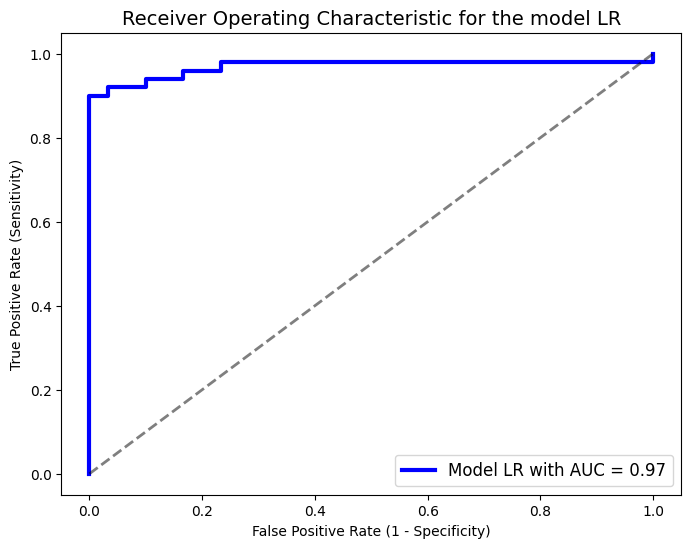

Confusion matrix of the model NB : 
[[30  0]
 [ 5 45]]
True Negative of the model NB -> 30
False Positive of the model NB -> 0
False Negative of the model NB -> 5
True Positive of the model NB -> 45
Accuracy of the model NB -> 0.9375
Misclassification rate of the model NB -> 0.0625
Precision of the model NB -> 1.0
Recall of the model NB -> 0.9
F1 Measure of the model NB -> 0.9473684210526316
AUC of the model NB -> 0.944




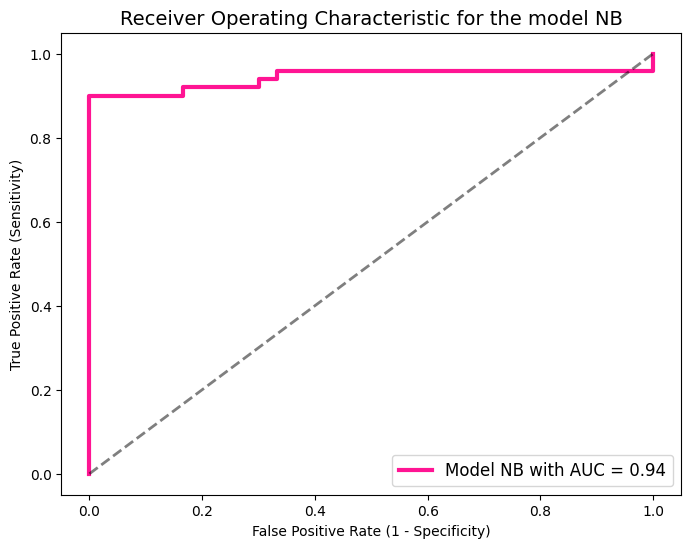

Confusion matrix of the model DT : 
[[30  0]
 [12 38]]
True Negative of the model DT -> 30
False Positive of the model DT -> 0
False Negative of the model DT -> 12
True Positive of the model DT -> 38
Accuracy of the model DT -> 0.85
Misclassification rate of the model DT -> 0.15000000000000002
Precision of the model DT -> 1.0
Recall of the model DT -> 0.76
F1 Measure of the model DT -> 0.8636363636363636
AUC of the model DT -> 0.88




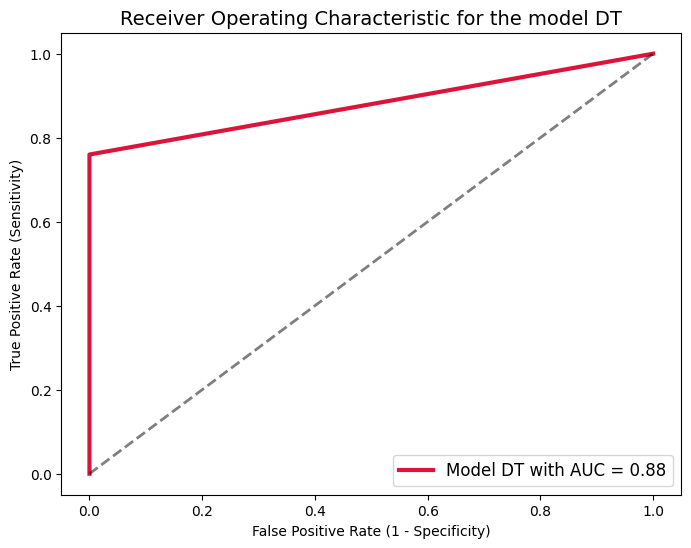

Confusion matrix of the model SVM : 
[[30  0]
 [ 5 45]]
True Negative of the model SVM -> 30
False Positive of the model SVM -> 0
False Negative of the model SVM -> 5
True Positive of the model SVM -> 45
Accuracy of the model SVM -> 0.9375
Misclassification rate of the model SVM -> 0.0625
Precision of the model SVM -> 1.0
Recall of the model SVM -> 0.9
F1 Measure of the model SVM -> 0.9473684210526316
AUC of the model SVM -> 0.9673333333333334




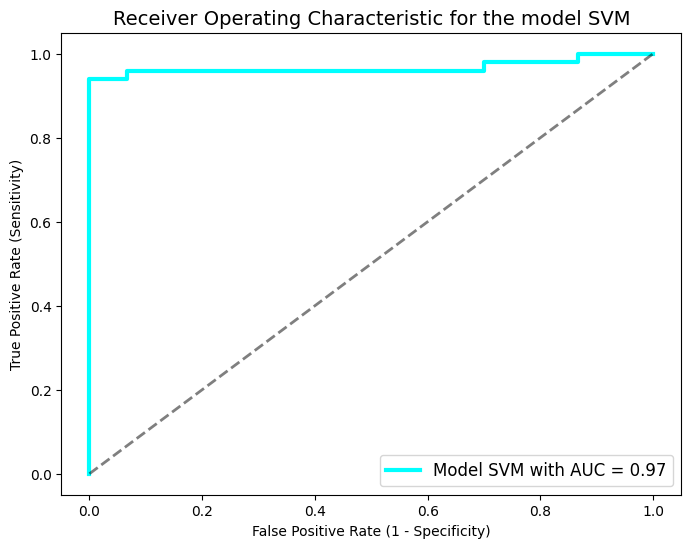

Confusion matrix of the model KNN : 
[[30  0]
 [16 34]]
True Negative of the model KNN -> 30
False Positive of the model KNN -> 0
False Negative of the model KNN -> 16
True Positive of the model KNN -> 34
Accuracy of the model KNN -> 0.8
Misclassification rate of the model KNN -> 0.19999999999999996
Precision of the model KNN -> 1.0
Recall of the model KNN -> 0.68
F1 Measure of the model KNN -> 0.8095238095238095
AUC of the model KNN -> 0.9509999999999998




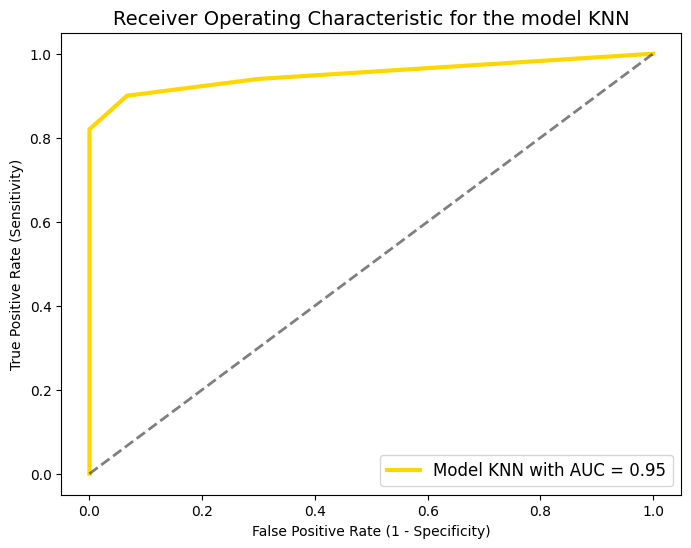

Confusion matrix of the model KNN 10 Fold : 
[[26  4]
 [ 7 43]]
True Negative of the model KNN 10 Fold -> 26
False Positive of the model KNN 10 Fold -> 4
False Negative of the model KNN 10 Fold -> 7
True Positive of the model KNN 10 Fold -> 43
Accuracy of the model KNN 10 Fold -> 0.8625
Misclassification rate of the model KNN 10 Fold -> 0.13749999999999996
Precision of the model KNN 10 Fold -> 0.9148936170212766
Recall of the model KNN 10 Fold -> 0.86
F1 Measure of the model KNN 10 Fold -> 0.8865979381443299
AUC of the model KNN 10 Fold -> 0.93




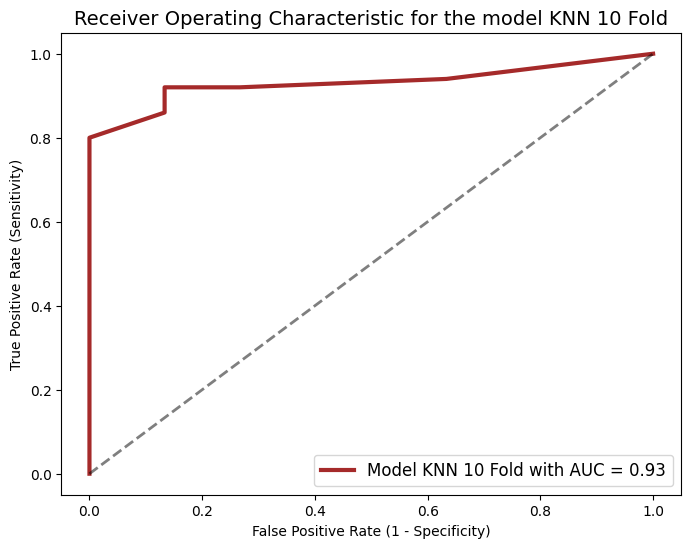

Confusion matrix of the model RF : 
[[30  0]
 [13 37]]
True Negative of the model RF -> 30
False Positive of the model RF -> 0
False Negative of the model RF -> 13
True Positive of the model RF -> 37
Accuracy of the model RF -> 0.8375
Misclassification rate of the model RF -> 0.16249999999999998
Precision of the model RF -> 1.0
Recall of the model RF -> 0.74
F1 Measure of the model RF -> 0.8505747126436781
AUC of the model RF -> 0.9346666666666668




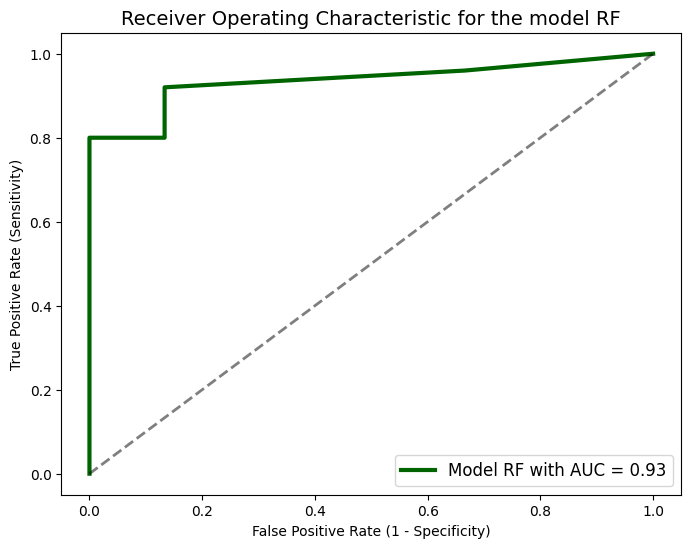

Confusion matrix of the model Bagging : 
[[30  0]
 [ 8 42]]
True Negative of the model Bagging -> 30
False Positive of the model Bagging -> 0
False Negative of the model Bagging -> 8
True Positive of the model Bagging -> 42
Accuracy of the model Bagging -> 0.9
Misclassification rate of the model Bagging -> 0.09999999999999998
Precision of the model Bagging -> 1.0
Recall of the model Bagging -> 0.84
F1 Measure of the model Bagging -> 0.9130434782608696
AUC of the model Bagging -> 0.9199999999999999




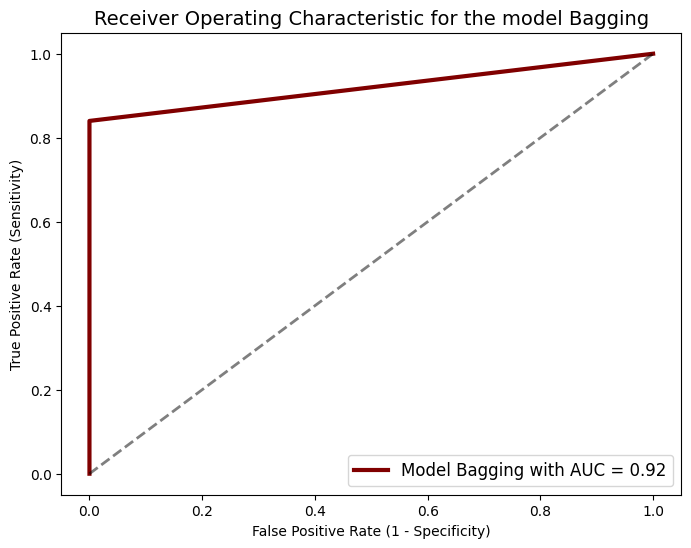

Confusion matrix of the model XGBoost : 
[[30  0]
 [12 38]]
True Negative of the model XGBoost -> 30
False Positive of the model XGBoost -> 0
False Negative of the model XGBoost -> 12
True Positive of the model XGBoost -> 38
Accuracy of the model XGBoost -> 0.85
Misclassification rate of the model XGBoost -> 0.15000000000000002
Precision of the model XGBoost -> 1.0
Recall of the model XGBoost -> 0.76
F1 Measure of the model XGBoost -> 0.8636363636363636
AUC of the model XGBoost -> 0.944




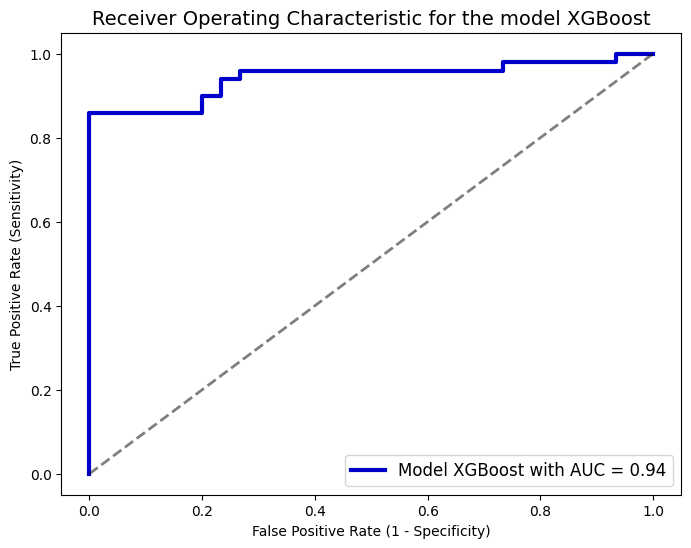

Confusion matrix of the model Adaboost : 
[[30  0]
 [ 5 45]]
True Negative of the model Adaboost -> 30
False Positive of the model Adaboost -> 0
False Negative of the model Adaboost -> 5
True Positive of the model Adaboost -> 45
Accuracy of the model Adaboost -> 0.9375
Misclassification rate of the model Adaboost -> 0.0625
Precision of the model Adaboost -> 1.0
Recall of the model Adaboost -> 0.9
F1 Measure of the model Adaboost -> 0.9473684210526316
AUC of the model Adaboost -> 0.9616666666666666




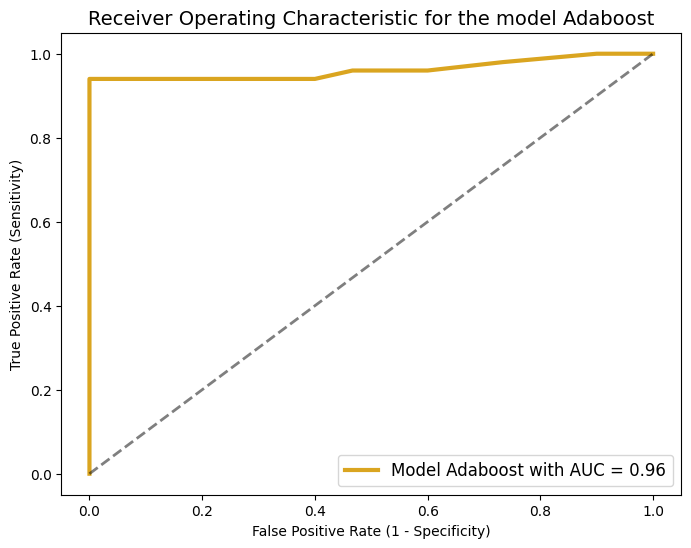

Confusion matrix of the model Catboost : 
[[30  0]
 [10 40]]
True Negative of the model Catboost -> 30
False Positive of the model Catboost -> 0
False Negative of the model Catboost -> 10
True Positive of the model Catboost -> 40
Accuracy of the model Catboost -> 0.875
Misclassification rate of the model Catboost -> 0.125
Precision of the model Catboost -> 1.0
Recall of the model Catboost -> 0.8
F1 Measure of the model Catboost -> 0.888888888888889
AUC of the model Catboost -> 0.95




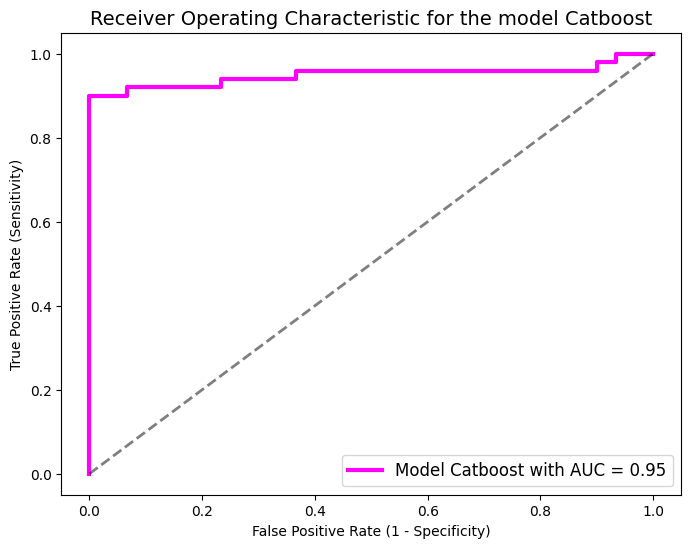

Confusion matrix of the model GradientBoost : 
[[30  0]
 [ 9 41]]
True Negative of the model GradientBoost -> 30
False Positive of the model GradientBoost -> 0
False Negative of the model GradientBoost -> 9
True Positive of the model GradientBoost -> 41
Accuracy of the model GradientBoost -> 0.8875
Misclassification rate of the model GradientBoost -> 0.11250000000000004
Precision of the model GradientBoost -> 1.0
Recall of the model GradientBoost -> 0.82
F1 Measure of the model GradientBoost -> 0.9010989010989011
AUC of the model GradientBoost -> 0.9536666666666667




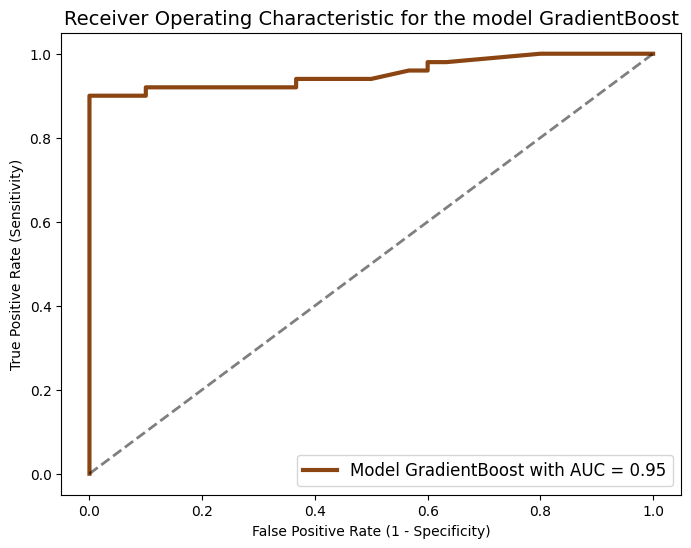

Confusion matrix of the model Stacking : 
[[30  0]
 [ 5 45]]
True Negative of the model Stacking -> 30
False Positive of the model Stacking -> 0
False Negative of the model Stacking -> 5
True Positive of the model Stacking -> 45
Accuracy of the model Stacking -> 0.9375
Misclassification rate of the model Stacking -> 0.0625
Precision of the model Stacking -> 1.0
Recall of the model Stacking -> 0.9
F1 Measure of the model Stacking -> 0.9473684210526316
AUC of the model Stacking -> 0.9626666666666668




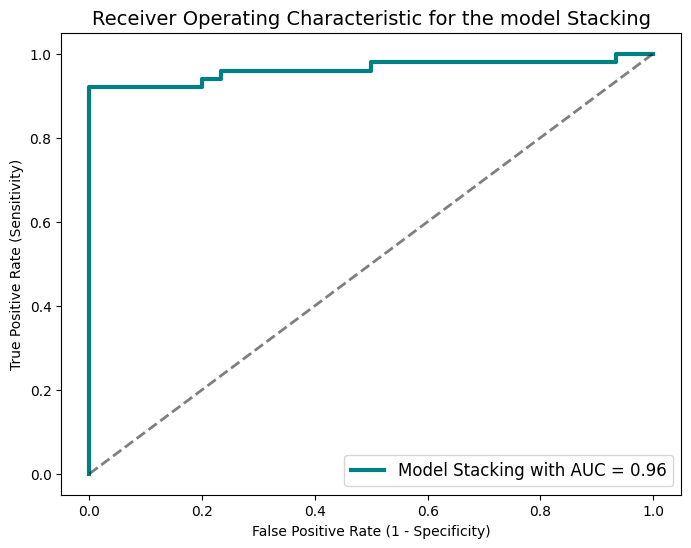

Confusion matrix of the model Voting Hard : 
[[30  0]
 [ 8 42]]
True Negative of the model Voting Hard -> 30
False Positive of the model Voting Hard -> 0
False Negative of the model Voting Hard -> 8
True Positive of the model Voting Hard -> 42
Accuracy of the model Voting Hard -> 0.9
Misclassification rate of the model Voting Hard -> 0.09999999999999998
Precision of the model Voting Hard -> 1.0
Recall of the model Voting Hard -> 0.84
F1 Measure of the model Voting Hard -> 0.9130434782608696
AUC of the model Voting Hard -> 0.9199999999999999




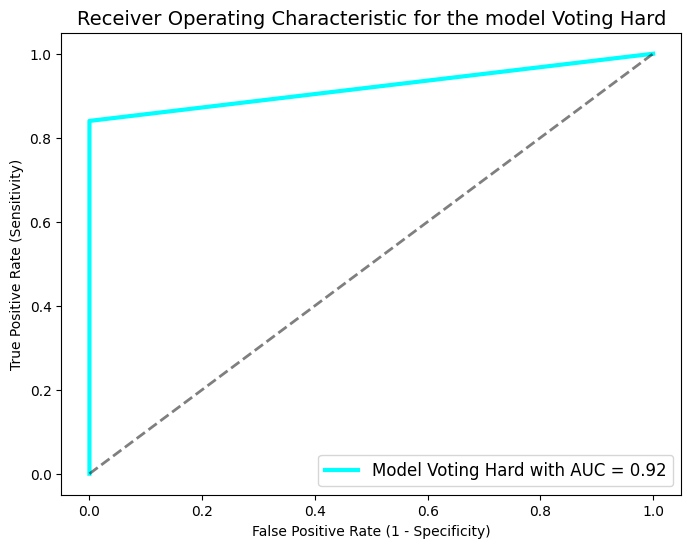

Confusion matrix of the model Voting Soft : 
[[30  0]
 [ 6 44]]
True Negative of the model Voting Soft -> 30
False Positive of the model Voting Soft -> 0
False Negative of the model Voting Soft -> 6
True Positive of the model Voting Soft -> 44
Accuracy of the model Voting Soft -> 0.925
Misclassification rate of the model Voting Soft -> 0.07499999999999996
Precision of the model Voting Soft -> 1.0
Recall of the model Voting Soft -> 0.88
F1 Measure of the model Voting Soft -> 0.9361702127659575
AUC of the model Voting Soft -> 0.9646666666666667




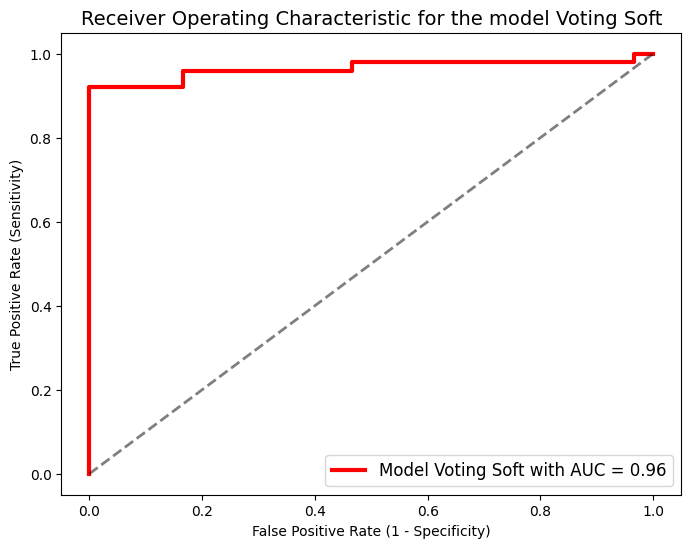

Confusion matrix of the model Blending : 
[[30  0]
 [ 6 44]]
True Negative of the model Blending -> 30
False Positive of the model Blending -> 0
False Negative of the model Blending -> 6
True Positive of the model Blending -> 44
Accuracy of the model Blending -> 0.925
Misclassification rate of the model Blending -> 0.07499999999999996
Precision of the model Blending -> 1.0
Recall of the model Blending -> 0.88
F1 Measure of the model Blending -> 0.9361702127659575
AUC of the model Blending -> 0.95




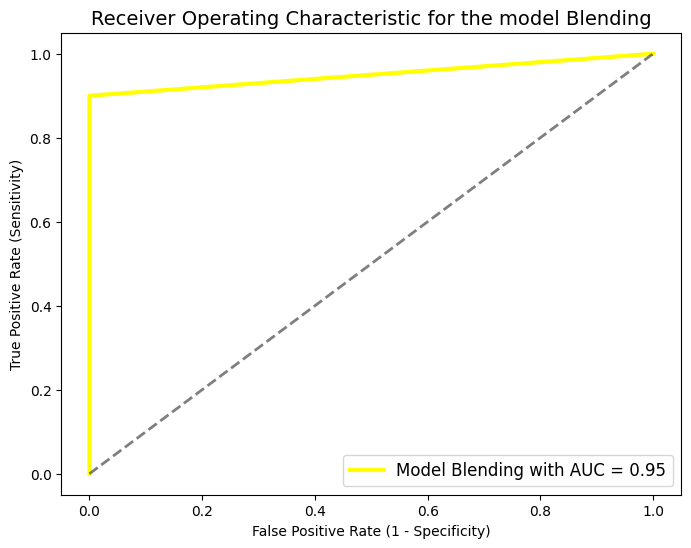

3/3 [==============================] - 0s 6ms/step
Confusion matrix of the model ANN : 
[[30  0]
 [ 4 46]]
True Negative of the model ANN -> 30
False Positive of the model ANN -> 0
False Negative of the model ANN -> 4
True Positive of the model ANN -> 46
Accuracy of the model ANN -> 0.95
Misclassification rate of the model ANN -> 0.050000000000000044
Precision of the model ANN -> 1.0
Recall of the model ANN -> 0.92
F1 Measure of the model ANN -> 0.9583333333333334
AUC of the model ANN -> 0.96




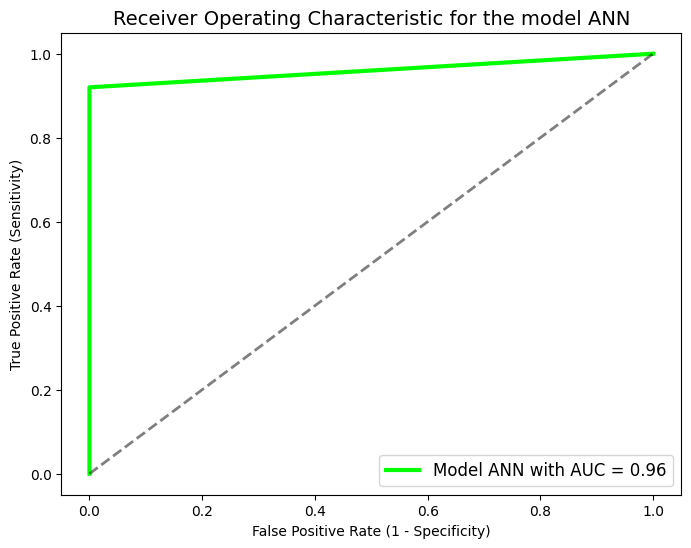

Confusion matrix of the model MLP : 
[[30  0]
 [ 4 46]]
True Negative of the model MLP -> 30
False Positive of the model MLP -> 0
False Negative of the model MLP -> 4
True Positive of the model MLP -> 46
Accuracy of the model MLP -> 0.95
Misclassification rate of the model MLP -> 0.050000000000000044
Precision of the model MLP -> 1.0
Recall of the model MLP -> 0.92
F1 Measure of the model MLP -> 0.9583333333333334
AUC of the model MLP -> 0.9726666666666667




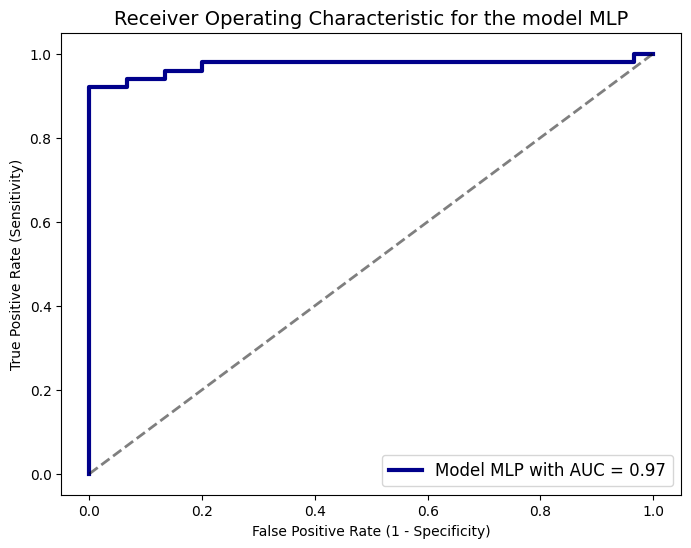

3/3 [==============================] - 1s 6ms/step
Confusion matrix of the model SimpleRNN : 
[[30  0]
 [ 5 45]]
True Negative of the model SimpleRNN -> 30
False Positive of the model SimpleRNN -> 0
False Negative of the model SimpleRNN -> 5
True Positive of the model SimpleRNN -> 45
Accuracy of the model SimpleRNN -> 0.9375
Misclassification rate of the model SimpleRNN -> 0.0625
Precision of the model SimpleRNN -> 1.0
Recall of the model SimpleRNN -> 0.9
F1 Measure of the model SimpleRNN -> 0.9473684210526316
AUC of the model SimpleRNN -> 0.95




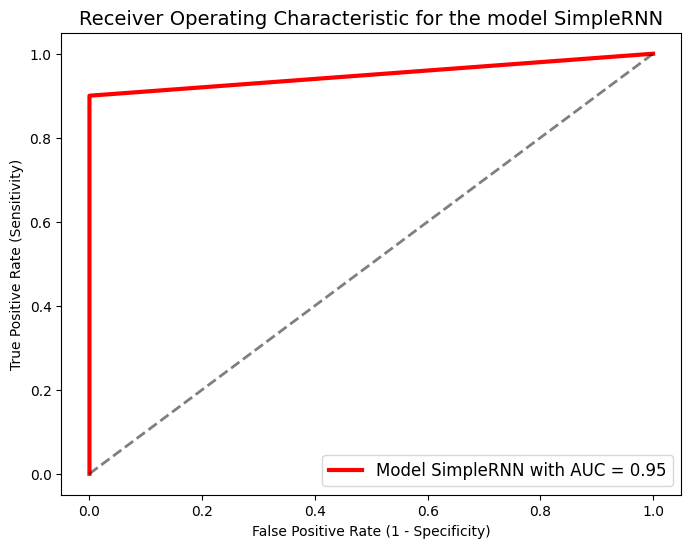

3/3 [==============================] - 2s 6ms/step
Confusion matrix of the model LSTM : 
[[30  0]
 [ 5 45]]
True Negative of the model LSTM -> 30
False Positive of the model LSTM -> 0
False Negative of the model LSTM -> 5
True Positive of the model LSTM -> 45
Accuracy of the model LSTM -> 0.9375
Misclassification rate of the model LSTM -> 0.0625
Precision of the model LSTM -> 1.0
Recall of the model LSTM -> 0.9
F1 Measure of the model LSTM -> 0.9473684210526316
AUC of the model LSTM -> 0.95




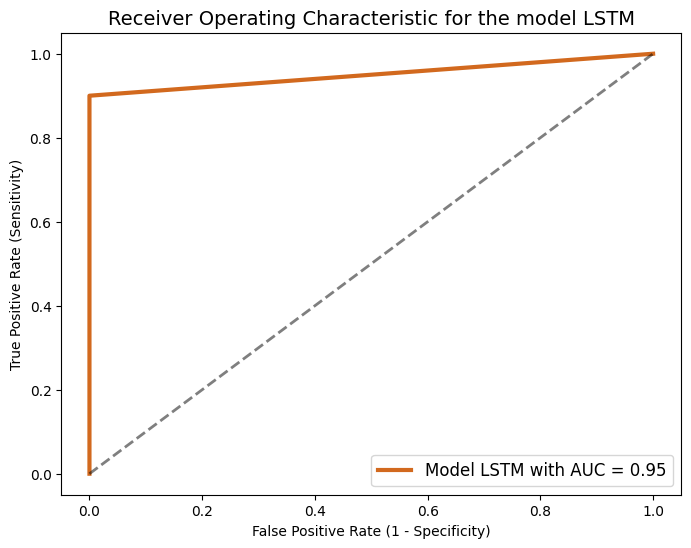

3/3 [==============================] - 2s 6ms/step
Confusion matrix of the model GRU : 
[[30  0]
 [ 5 45]]
True Negative of the model GRU -> 30
False Positive of the model GRU -> 0
False Negative of the model GRU -> 5
True Positive of the model GRU -> 45
Accuracy of the model GRU -> 0.9375
Misclassification rate of the model GRU -> 0.0625
Precision of the model GRU -> 1.0
Recall of the model GRU -> 0.9
F1 Measure of the model GRU -> 0.9473684210526316
AUC of the model GRU -> 0.95




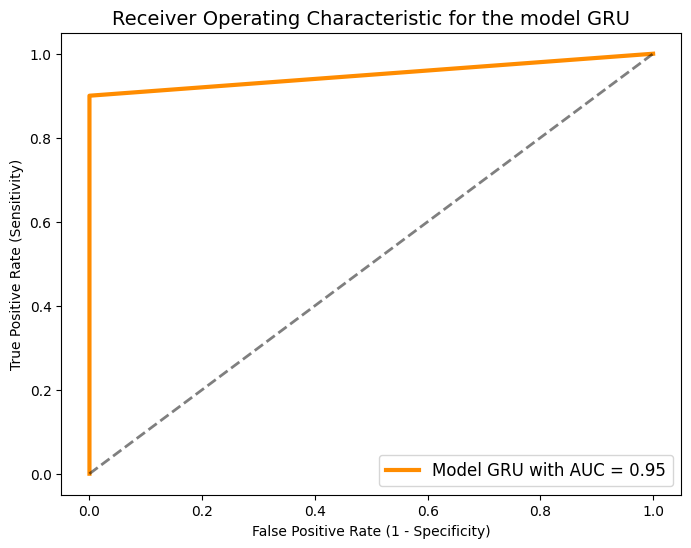

In [52]:
model_names = ml_names + em_names + dl_names
legend_names = lml_names + lem_names + ldl_names
colors_names = cml_names + cem_names + cdl_names

def eval_function_with_roc_plot():
    ml_curves = []
    em_curves = []
    dl_curves = []
    
    for model in model_names:
        name = legend_names[model_names.index(model)]
        
        if name == "SVM":
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = eval(f"model_{model}.decision_function(test_data[Features])")
        elif name == "Bagging":
            model_proba = np.round(eval(f"model_{model}"))
            model_prediction = model_proba
        elif name == "Voting Hard":
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = model_prediction
        elif name == "Blending":
            model_predictions = eval(f"model_{model}.predict(meta_predictions)")
            model_proba = eval(f"model_{model}.predict_proba(meta_predictions)[:, 1] ")
        elif name == "ANN":
            model_proba = eval(f"model_{model}.predict(test_features.reshape(test_features.shape[0], -1))")
            model_proba = np.where(model_proba> 0.5, 1, 0)
            model_prediction = model_proba
        elif name == "SimpleRNN" or name == "LSTM" or name == "GRU":
            model_proba = eval(f"model_{model}.predict(test_features)")
            model_proba = np.where(model_proba> 0.5, 1, 0)
            model_prediction = model_proba
        else:
            model_prediction = eval(f"model_{model}.predict(test_data[Features])")
            model_proba = eval(f"model_{model}.predict_proba(test_data[Features])[:, 1] ")
        
        model_cm = confusion_matrix(test_labels, model_prediction)    
        tn, fp, fn, tp = model_cm.ravel()
        
        model_accuracy = accuracy_score(test_labels, model_prediction)
        model_misclassification = 1 - accuracy_score(test_labels, model_prediction)
        model_precision = precision_score(test_labels, model_prediction)
        model_recall = recall_score(test_labels, model_prediction)
        model_f1 = f1_score(test_labels, model_prediction)
        
        model_fpr, model_tpr, model_thresholds = roc_curve(test_labels, model_proba)
        model_auc = auc(model_fpr, model_tpr)

        print(f"Confusion matrix of the model {name} : \n{model_cm}")
        print(f'True Negative of the model {name} -> {tn}')
        print(f'False Positive of the model {name} -> {fp}')
        print(f'False Negative of the model {name} -> {fn}')
        print(f'True Positive of the model {name} -> {tp}')
        print(f"Accuracy of the model {name} -> {model_accuracy}")
        print(f"Misclassification rate of the model {name} -> {model_misclassification}")
        print(f"Precision of the model {name} -> {model_precision}")
        print(f"Recall of the model {name} -> {model_recall}")
        print(f"F1 Measure of the model {name} -> {model_f1}")
        print(f"AUC of the model {name} -> {model_auc}")
        print("\n")

        plt.figure(figsize=(8, 6))
        roc = "plt.plot(model_fpr, model_tpr, color=colors_names[model_names.index(model)], lw=3, label=f'Model {name} with AUC = {round(model_auc, 2)}' % model_auc)"
        eval(f"{roc}")
        plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)

        # Customize legend position
        plt.legend(loc = 'lower right', fontsize=12)

        # Add labels and title
        plt.xlabel('False Positive Rate (1 - Specificity)')
        plt.ylabel('True Positive Rate (Sensitivity)')
        plt.title(f'Receiver Operating Characteristic for the model {name}', fontsize=14)
        plt.show()
        
        if name in lml_names:
            ml_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
        elif name in lem_names:
            em_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
        elif name in ldl_names:
            dl_curves.append([model_fpr, model_tpr, colors_names[model_names.index(model)], name, model_auc])
            
    return ml_curves, em_curves, dl_curves

    
ml_c, em_c, dl_c = eval_function_with_roc_plot()
print("\n")

# ROC-AUC Curve [Combined]

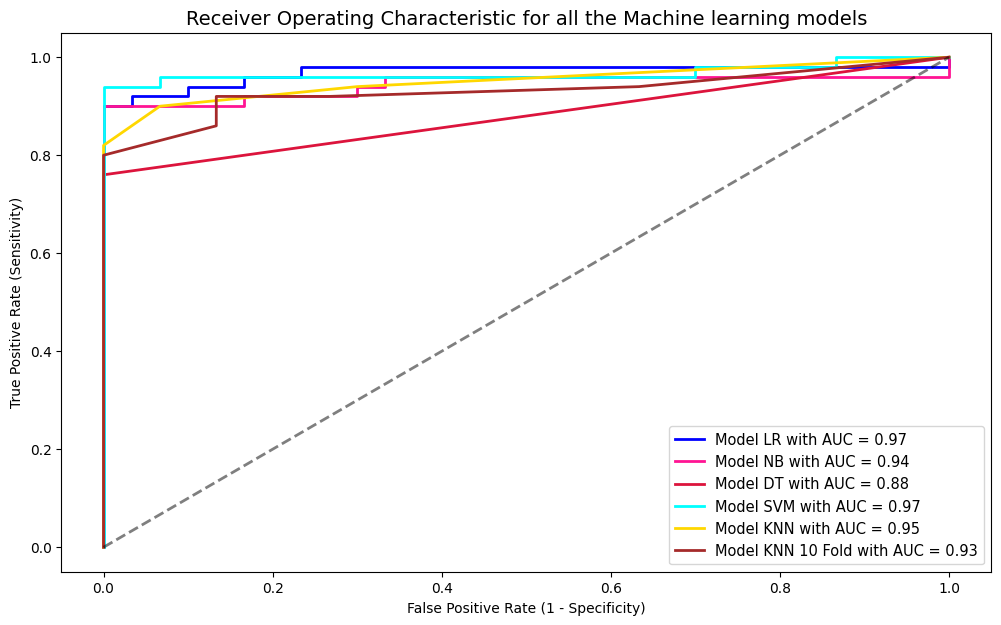

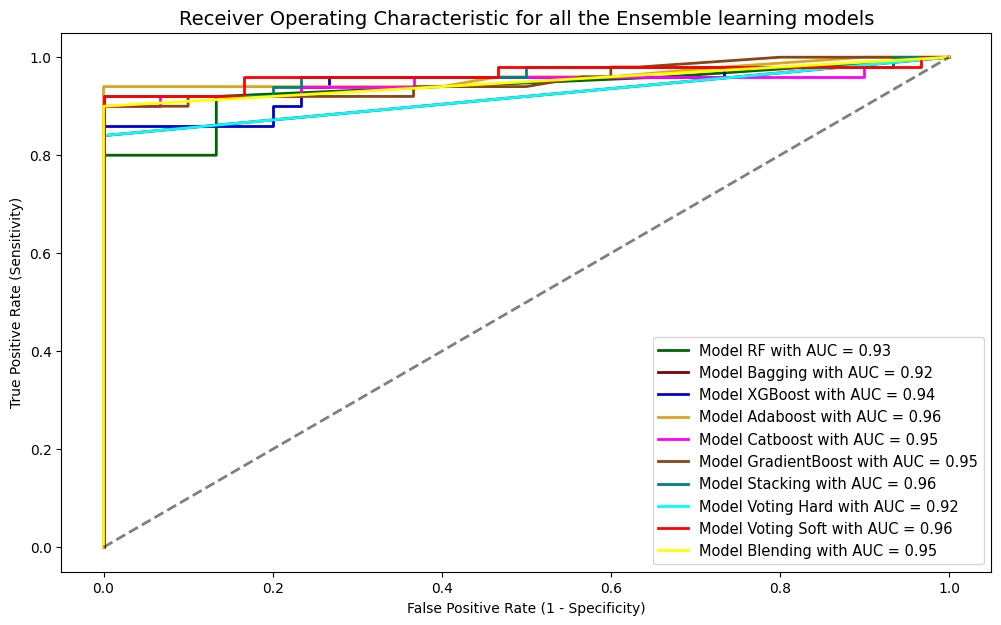

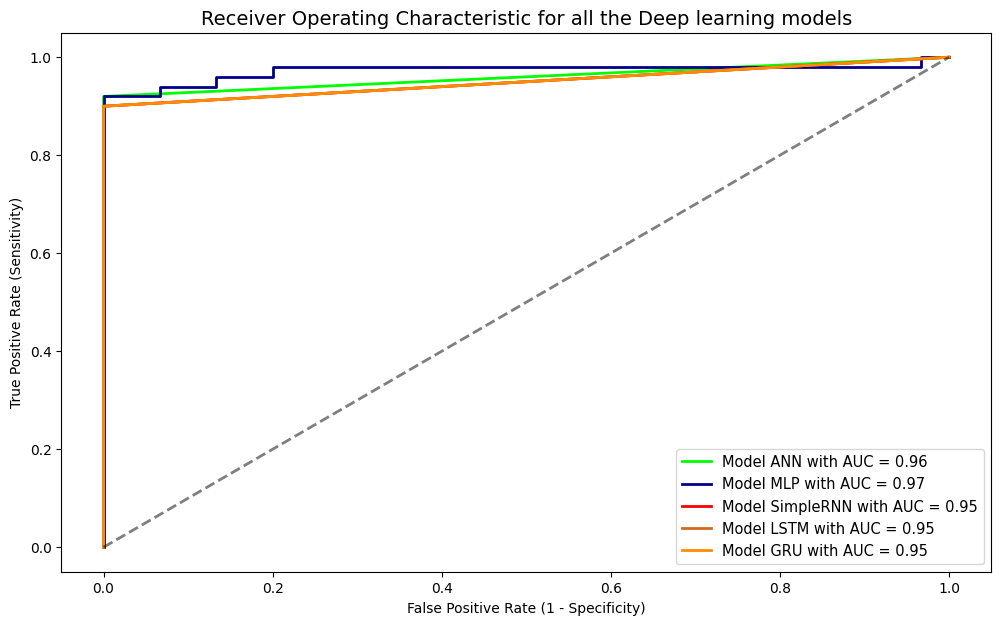

In [53]:
roc_curves = [ml_c, em_c, dl_c]
names = ["Machine", "Ensemble", "Deep"]

for i in range(len(roc_curves)):
    plt.figure(figsize=(12, 7))
    for j in range(len(roc_curves[i])):
        plt.plot(roc_curves[i][j][0], roc_curves[i][j][1], color=roc_curves[i][j][2], lw=2, label=f'Model {roc_curves[i][j][3]} with AUC = {round(roc_curves[i][j][4], 2)}')

    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2, alpha=0.5)

    # Customize legend position
    plt.legend(loc = 'lower right', fontsize=10.5)

    # Add labels and title
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title(f'Receiver Operating Characteristic for all the {names[i]} learning models', fontsize=14)

    # Show the plot
    plt.show()

### ROC-AUC Curve [ALL in ONE]